**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df=pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


**PREPARING DATA**

In [ ]:
df=df.rename(columns={'Adj Close':'Adj_Close'})
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')

In [ ]:
features=['Adj_Close']

In [ ]:
df[features]

,Adj_Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
X=df[features].values
y=df[features].values

In [ ]:
n_features_input=len(features)
n_features_output=len(features)

**PRA PREPROCESSING DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

In [ ]:
def sequences(X,y,time_steps=1):
  X_seq,y_seq=[],[]

  for i in range(len(X)-time_steps):
    X_seq.append(X[i:i+time_steps])
    y_seq.append(y[i+time_steps])
  return np.array(X_seq),np.array(y_seq)

**SPLITTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42,shuffle=False)

In [ ]:
ts=2
X_train_seq,y_train_seq=sequences(X_train,y_train,ts)
X_test_seq,y_test_seq=sequences(X_test,y_test,ts)

**BUILDING LSTM MODEL**

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(ts,n_features_input)))
model.add(Dropout(0.2))
model.add(LSTM(units=30,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(n_features_output))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
history=model.fit(X_train_seq,y_train_seq,validation_data=(X_test_seq,y_test_seq),epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0934 - val_loss: 0.0995
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - val_loss: 0.0392
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [ ]:
y_pred=model.predict(X_test_seq)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [ ]:
y_pred_invers=scaler.inverse_transform(y_pred)

In [ ]:
y_test_invers=scaler.inverse_transform(y_test_seq)

**SAVE THE RESULT OF PREDICTION TO EXCEL FILE**

In [ ]:
target_index=0

data_export={
    'Prediksi':y_pred_invers[:,0],
    'Aktual':y_test_invers[:,0]
}
data_export=pd.DataFrame(data_export)
data_export.to_excel('ntflx.xlsx')

**VISUALIZATION**

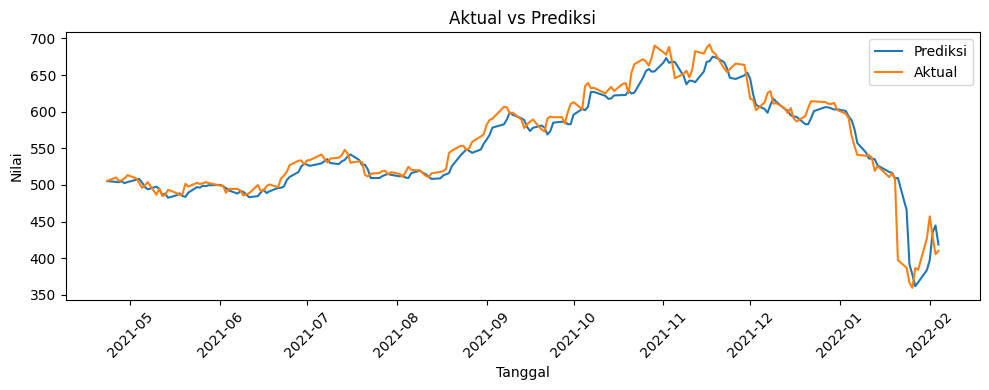

In [ ]:
import matplotlib.pyplot as plt

# Pastikan Anda menggunakan index tanggal dari DataFrame Anda
plt.figure(figsize=(10, 4))
plt.plot(df.index[-len(y_pred_invers):], y_pred_invers[:, 0], label='Prediksi')  # Menggunakan index untuk prediksi
plt.plot(df.index[-len(y_test_invers):], y_test_invers[:, 0], label='Aktual')  # Menggunakan index untuk aktual

# Tambahkan label untuk sumbu X dan Y serta judul
plt.xlabel('Tanggal')  # Label untuk sumbu X
plt.ylabel('Nilai')    # Label untuk sumbu Y
plt.title('Aktual vs Prediksi')  # Judul grafik

# Tambahkan legend
plt.legend()

# Atur format tanggal (opsional, jika perlu)
plt.xticks(rotation=45)  # Memutar label sumbu X untuk keterbacaan
plt.tight_layout()  # Menjaga layout tetap rapi
plt.show()


In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Vall Loss')
plt.legend()
plt.show()